# Real Data KPP

This notebook presents how to compute the fits for all real KPP data and produces the figures and table

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fitle as fl
import mplhep
import uproot
import vector
mplhep.style.use(mplhep.style.LHCb2)

In [3]:
def plot_mass_spectrum(Dp_M, model_func, components, log=False):
    fig, ax = plt.subplots()
    x = np.linspace(1840, 2040, 5000)

    if log:
        plt.yscale('log')

    # histogram
    counts, edges = np.histogram(Dp_M, bins=200)
    plt.plot((edges[:-1] + edges[1:])/2, counts, label="Data")

    # main model
    plt.plot(x, model_func(x), label='Fit')

    # components
    for label, val in components.items():
        if isinstance(val, tuple):
            func, style = val
        else:
            func, style = val, {}
        plt.plot(x, func(x), label=label, **style)

    plt.ylabel('Entries per 1 MeV')
    plt.xlabel('$m(K K \pi)$         [MeV]')

    ymax = np.max(model_func(x)) * (2.5 if log else 1.05)
    plt.axis([1840, 2040, 40, ymax])

    plt.legend(bbox_to_anchor=[0.58, 0.5] if log else [0.69, 1])
    plt.text(
        0.05, 0.95, 'LHCb Preliminary',
        ha='left', va='top',
        transform=ax.transAxes,
        size=40
    )

    return fig, ax

In [43]:
Dp_M = np.load("../data/observed/kpp.npy")
Dp_M = Dp_M[Dp_M < 1970]

In [35]:
conv_kkp_mass = fl.Param(1860)('mass')
conv_kkp_signal = (fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv_kkp_mass, fl.Param.positive(5))+
                   fl.Param.positive(500000)* fl.convolve( Dp_x,Dp_c,Dp_mother_mass, conv_kkp_mass, fl.Param.positive(10)))
conv_kkp_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1790)
conv_kkp = conv_kkp_signal+conv_kkp_tail

In [41]:
fit_conv_kkp = fl.fit(conv_kkp | fl.Cost.chi2(Dp_M, 200))
fit_conv_kkp.minimizer

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7568                       │        Nfcn = 173, Ngrad = 27        │
│ EDM = 3.93e-05 (Goal: 0.0002)    │            time = 3.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  6.925e6  │  0.032e6  │            │            │  1e-06  │         │       │
│ 1 │ x1   │   6.781   │   0.010   │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.8692941e3│0.0000025e3│            │            │         │         │       │
│ 3 │ x3   │  2.117e6  │  0.032e6  │            │            │  1e-06  │         │       │
│ 4 │ x4   │  10.729   │   0.034   │            │            │  1e-06  │         │       │
│ 5 │ x5   │  147.5e3  │   0.8e3   │            │            │  1e-06  │         │       │
│ 6 │ x6   │   121.8   │    0.9    │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6 │
├────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     1.03e+09    291.29721  -165.846e-3         -1e9  1.0423086e3       -5.3e6    -1.7358e3 │
│ x1 │    291.29721     9.06e-05        -0e-6   -290.45980      0.28e-3     -1.32483     -0.46e-3 │
│ x2 │  -165.846e-3        -0e-6     6.33e-06   125.937e-3        -2e-6     7.027e-3       -65e-6 │
│ x3 │         -1e9   -290.45980   125.937e-3     1.02e+09 -1.0379824e3        5.2e6     1.7944e3 │
│ x4 │  1.0423086e3      0.28e-3        -2e-6 -1.0379824e3      0.00113      -6.6804      -0.0021 │
│ x5 │       -5.3e6     -1.32483     7.027e-3        5.2e6      -6.6804     5.93e+05        386.8 │
│ x6 │    -1.7358e3     -0.46e-3       -65e-6     1.7944e3      -0.0021        386.8        0.861 │
└────┴────────────────────────────────────────────────────────────────────────────────────────────┘

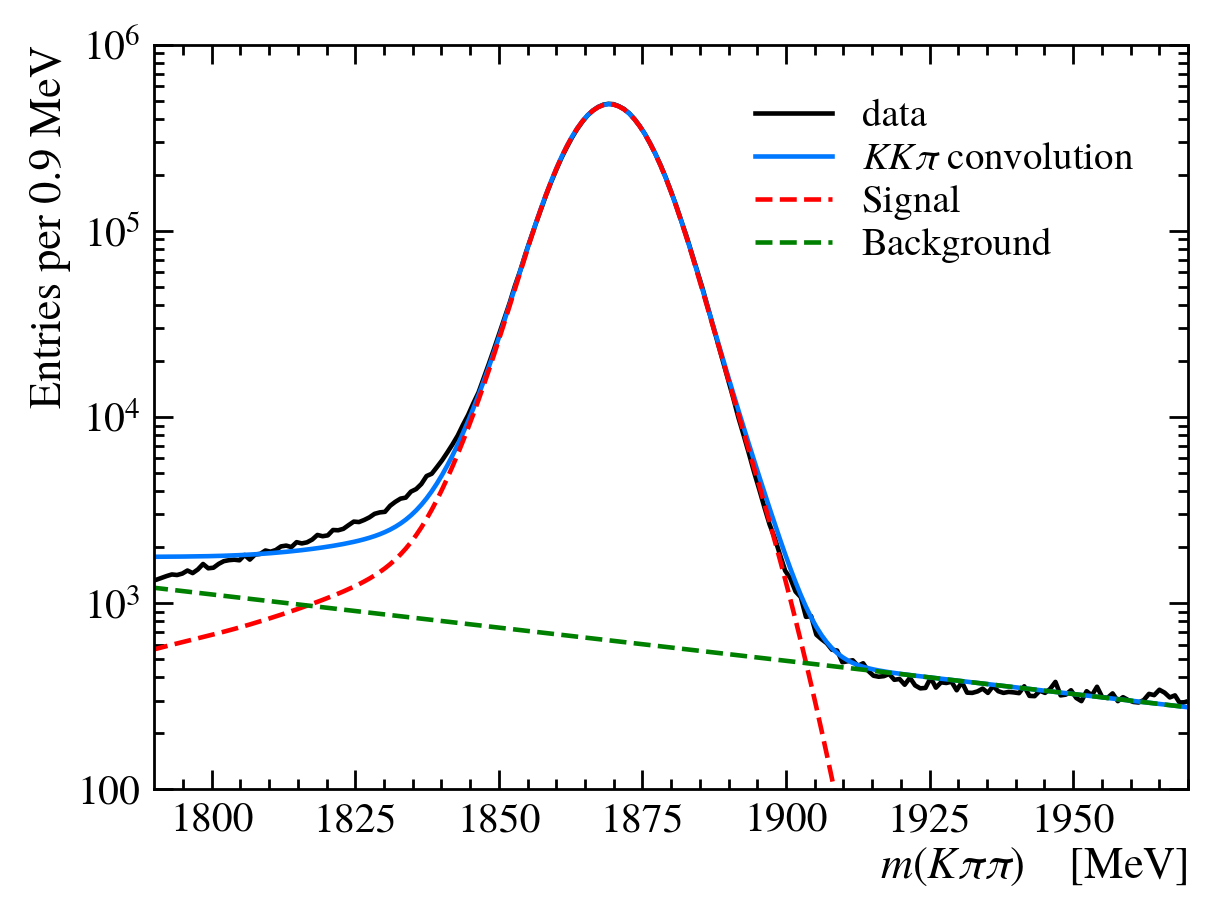

In [15]:
counts, centers = np.histogram(Dp_M, 200)
x = (centers[1:] + centers[:-1])/2
plt.plot(x, counts, color='black', label='data')
plt.plot(x,conv_kkp(x), label='$KK\pi$ convolution')
plt.plot(x,conv_kkp_signal(x), linestyle='--',color='red', label='Signal')
plt.plot(x,conv_kkp_tail(x), linestyle='--',color='green', label='Background')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [18]:
kpp_x, kpp_c = np.load("../data/mc/histograms/kpp.npy")
Dp_mother_mass = 1869.65

In [19]:
i = fl.index(len(kpp_c))
conv1_mass = fl.Param(1860)('mass')
conv1_signal = (fl.Param.positive(500000)* fl.convolve(kpp_x,kpp_c,Dp_mother_mass, conv1_mass, fl.Param.positive(5))+
                   fl.Param.positive(500000)* fl.convolve( kpp_x,kpp_c,Dp_mother_mass, conv1_mass, fl.Param.positive(10)))
conv1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1790)
conv1 = conv1_signal+conv1_tail

In [20]:
fit_conv1 = fl.fit(conv1 | fl.Cost.chi2(Dp_M, 200))
fit_conv1.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1144                       │        Nfcn = 92, Ngrad = 25         │
│ EDM = 4.21e-06 (Goal: 0.0002)    │            time = 7.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  6.99e6   │  0.04e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │   6.771   │   0.010   │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.8693942e3│0.0000025e3│            │            │         │         │       │
│ 3 │ x3   │  2.11e6   │  0.04e6   │            │            │  1e-06  │         │       │
│ 4 │ x4   │   10.55   │   0.04    │            │            │  1e-06  │         │       │
│ 5 │ x5   │  0.268e6  │  0.014e6  │            │            │  1e-06  │         │       │
│ 6 │ x6   │    600    │    40     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6 │
├────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     1.34e+09    359.80487  -511.860e-3       -1.3e9  1.3076718e3       0.04e9      158.5e3 │
│ x1 │    359.80487     0.000105        -0e-6   -358.89027      0.34e-3     10.64879     37.19e-3 │
│ x2 │  -511.860e-3        -0e-6     6.45e-06   512.673e-3        -2e-6    -1.393496    -3.890e-3 │
│ x3 │       -1.3e9   -358.89027   512.673e-3     1.33e+09 -1.3023151e3      -0.04e9     -146.1e3 │
│ x4 │  1.3076718e3      0.34e-3        -2e-6 -1.3023151e3      0.00136      54.2097       0.1925 │
│ x5 │       0.04e9     10.64879    -1.393496      -0.04e9      54.2097     1.88e+08      524.8e3 │
│ x6 │      158.5e3     37.19e-3    -3.890e-3     -146.1e3       0.1925      524.8e3     1.49e+03 │
└────┴────────────────────────────────────────────────────────────────────────────────────────────┘

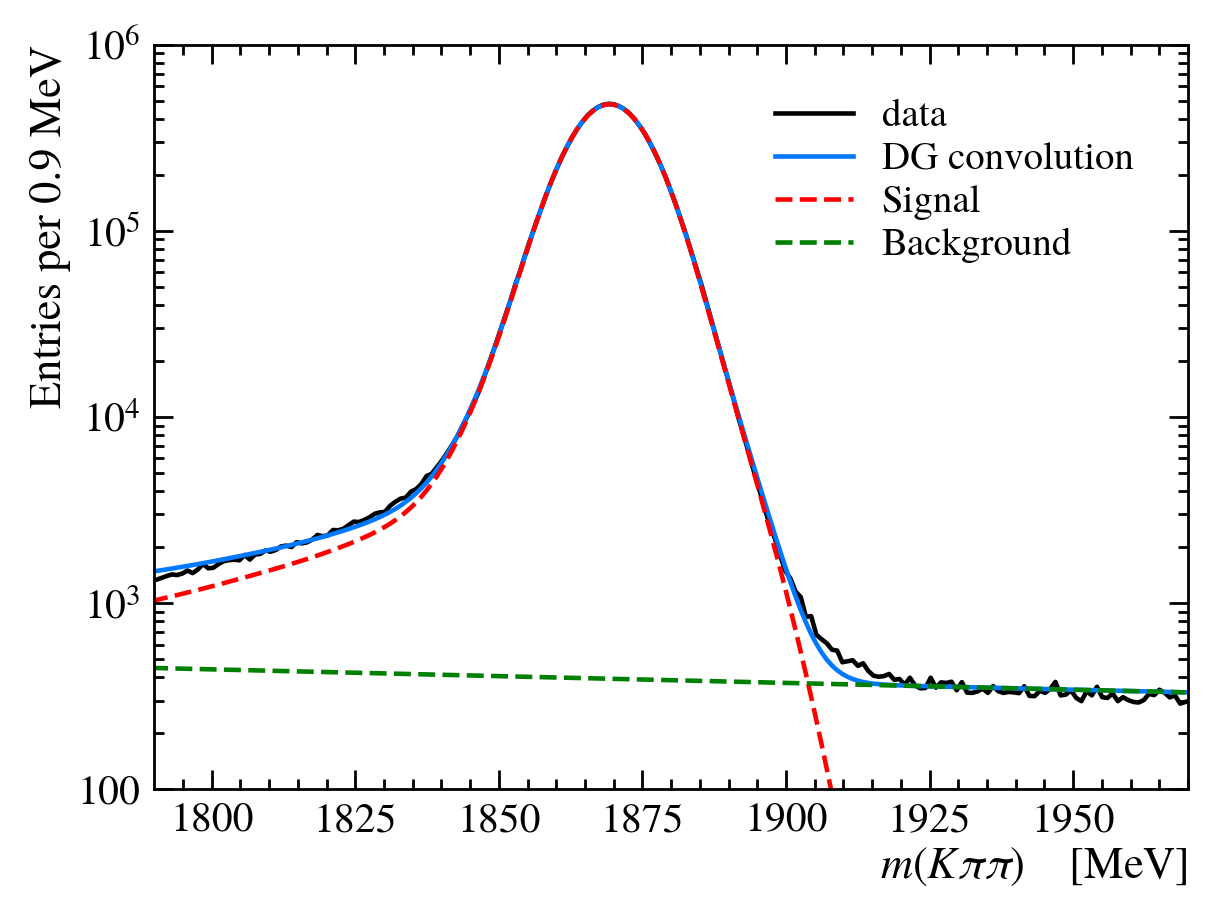

In [21]:
plt.plot(x, counts, color='black', label='data')
plt.plot(x,conv1(x), label='DG convolution')
plt.plot(x,conv1_signal(x), linestyle='--',color='red', label='Signal')
plt.plot(x, conv1_tail(x), linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [22]:
conv2_mass = fl.Param(1860)('mass')
conv2_signal = (fl.Param.positive(500000)* fl.convolve(kpp_x,kpp_c,Dp_mother_mass, conv2_mass, fl.Param.positive(5))+
                   fl.Param.positive(500000)* fl.convolve( kpp_x,kpp_c,Dp_mother_mass, conv2_mass, fl.Param.positive(6)) + 
                   fl.Param.positive(500000)* fl.convolve( kpp_x,kpp_c,Dp_mother_mass, conv2_mass, fl.Param.positive(10)))
conv2_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1790)
conv2 = conv2_signal+conv2_tail

In [23]:
fit_conv2 = fl.fit(conv2 | fl.Cost.chi2(Dp_M, 200))
fit_conv2.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 374.9                      │        Nfcn = 311, Ngrad = 68        │
│ EDM = 3.85e-05 (Goal: 0.0002)    │           time = 20.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  3.63e6   │  0.15e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │   9.13    │   0.10    │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.8693939e3│0.0000025e3│            │            │         │         │       │
│ 3 │ x3   │  5.33e6   │  0.16e6   │            │            │  1e-06  │         │       │
│ 4 │ x4   │   6.424   │   0.034   │            │            │  1e-06  │         │       │
│ 5 │ x5   │  0.139e6  │  0.021e6  │            │            │  1e-06  │         │       │
│ 6 │ x6   │   17.2    │    0.6    │            │            │  1e-06  │         │       │
│ 7 │ x7   │  0.344e6  │  0.035e6  │            │            │  1e-06  │         │       │
│ 8 │ x8   │  0.88e3   │  0.11e3   │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6           x7           x8 │
├────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     2.14e+10 -13.980815e3     3.139101    -0.024e12 -4.9682813e3        2.5e9   -70.8530e3       -0.6e9     -2.145e6 │
│ x1 │ -13.980815e3      0.00969        -3e-6  15.933489e3       0.0032  -1.925086e3        0.055      467.933        1.759 │
│ x2 │     3.139101        -3e-6     6.34e-06    -3.464134        -1e-6   267.277e-3       -13e-6    -3.650006   -11.271e-3 │
│ x3 │    -0.024e12  15.933489e3    -3.464134      2.7e+10  5.5540864e3       -3.0e9    84.0973e3        0.7e9      2.626e6 │
│ x4 │ -4.9682813e3       0.0032        -1e-6  5.5540864e3      0.00117    -578.0208       0.0162     132.2374       0.4971 │
│ x5 │        2.5e9  -1.925086e3   267.277e-3       -3.0e9    -578.0208     4.37e+08   -12.9970e3       -0.1e9     -0.428e6 │
│ x6 │   -70.8530e3        0.055       -13e-6    84.0973e3       0.0162   -12.9970e3        0.402     4.2875e3         16.0 │
│ x7 │       -0.6e9      467.933    -3.650006        0.7e9     132.2374       -0.1e9     4.2875e3     1.21e+09      3.684e6 │
│ x8 │     -2.145e6        1.759   -11.271e-3      2.626e6       0.4971     -0.428e6         16.0      3.684e6     1.13e+04 │
└────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

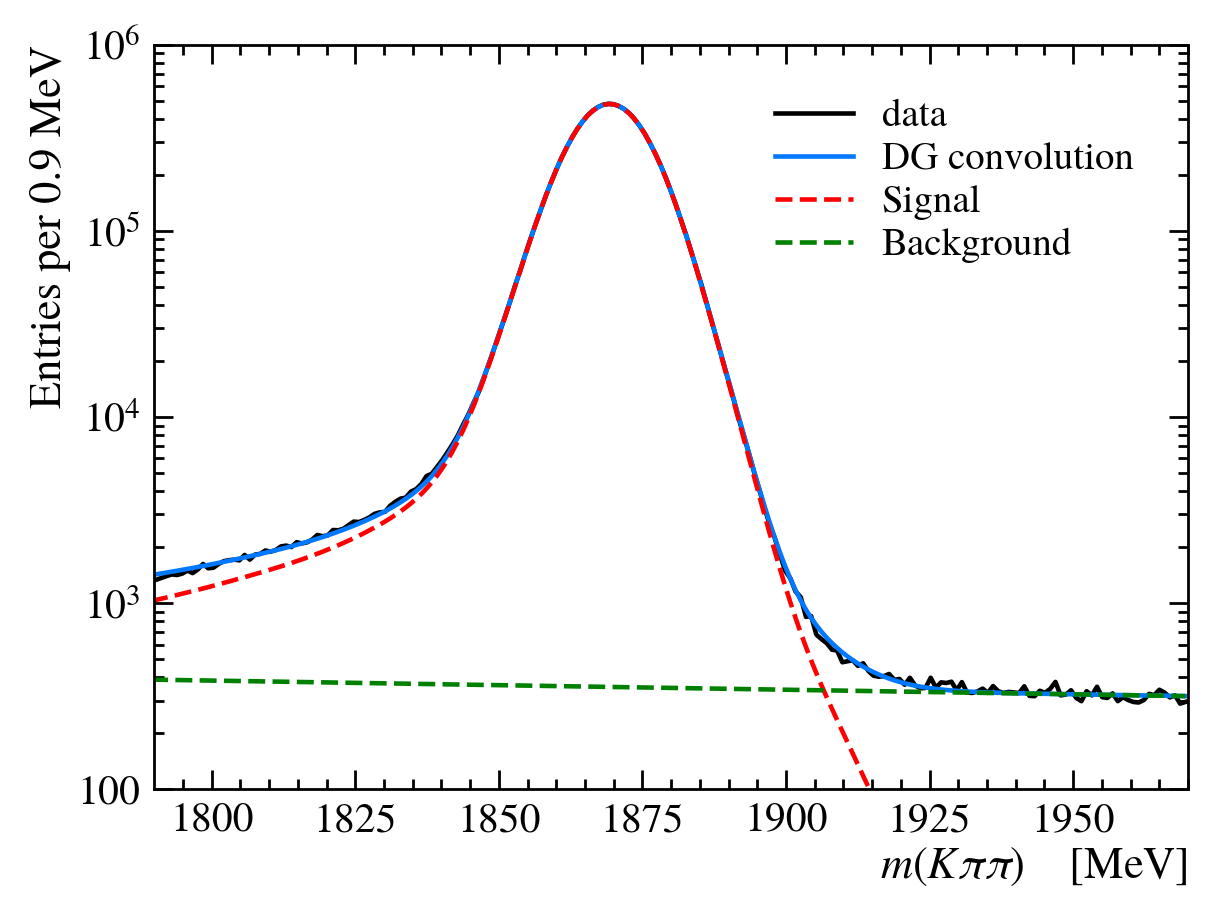

In [24]:
plt.plot(x, counts, color='black', label='data')
plt.plot(x,conv2(x), label='DG convolution')
plt.plot(x,conv2_signal(x), linestyle='--',color='red', label='Signal')
plt.plot(x, conv2_tail(x), linestyle='--',color='green', label='Background')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [25]:
crys1_mass = fl.Param(1870)('mass')
crys1_signal = (fl.Param.positive(600000)* fl.crystalball(fl.Param(0,10)(5), fl.Param(3)(1,30), crys1_mass, fl.Param.positive(5)('s1')) + 
            fl.Param.positive(600000)* fl.gaussian(crys1_mass, fl.Param.positive(6)('s2')))
crys1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1790)
crys1 = crys1_signal+crys1_tail

In [26]:
fit_crys1 = fl.fit(crys1 | fl.Cost.chi2(Dp_M, 200), numba=False, grad=False)
fit_crys1.minimizer

/data/home/twarner/.local/lib/python3.8/site-packages/fitle/model.py:409: RuntimeWarning: invalid value encountered in power
  '__pow__': named(lambda a, b: a ** b, 'pow'),


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2537                       │             Nfcn = 3046              │
│ EDM = 0.00013 (Goal: 0.0002)     │            time = 2.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   8.7e6   │   0.6e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │1.8692303e3│0.0000026e3│            │            │         │         │       │
│ 2 │ x2   │   6.692   │   0.010   │            │            │  1e-06  │         │       │
│ 3 │ x3   │   2.360   │   0.004   │            │            │    0    │   10    │       │
│ 4 │ x4   │   1.026   │   0.006   │            │            │    1    │   30    │       │
│ 5 │ x5   │  2.80e6   │  0.04e6   │            │            │  1e-06  │         │       │
│ 6 │ x6   │   9.879   │   0.027   │            │            │  1e-06  │         │       │
│ 7 │ x7   │   171e3   │    4e3    │            │            │  1e-06  │         │       │
│ 8 │ x8   │    277    │    11     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │            x0            x1            x2            x3            x4            x5            x6            x7            x8 │
├────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │      3.36e+11   -157.412309     -90.43042 1.379917804e3 -3.50799416e3        -0.2e9   1.4048614e3       0.859e9     3.13173e6 │
│ x1 │   -157.412309       6.9e-06         -4e-6         -3e-6          2e-6     16.979343        -14e-6    603.444e-3      2.036e-3 │
│ x2 │     -90.43042         -4e-6      0.000111      0.026e-3             0    -388.43084       0.24e-3      -2.57712      -4.94e-3 │
│ x3 │ 1.379917804e3         -3e-6      0.026e-3      1.89e-05     -0.014e-3   -109.617950      0.084e-3     -2.003798     -5.582e-3 │
│ x4 │ -3.50799416e3          2e-6             0     -0.014e-3      3.68e-05     -12.02601      -0.01e-3      -8.77784     -31.83e-3 │
│ x5 │        -0.2e9     16.979343    -388.43084   -109.617950     -12.02601      1.53e+09  -1.0073042e3       0.013e9       25.70e3 │
│ x6 │   1.4048614e3        -14e-6       0.24e-3      0.084e-3      -0.01e-3  -1.0073042e3      0.000726      -10.4217      -21.2e-3 │
│ x7 │       0.859e9    603.444e-3      -2.57712     -2.003798      -8.77784       0.013e9      -10.4217      1.29e+07       38.44e3 │
│ x8 │     3.13173e6      2.036e-3      -4.94e-3     -5.582e-3     -31.83e-3       25.70e3      -21.2e-3       38.44e3           125 │
└────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

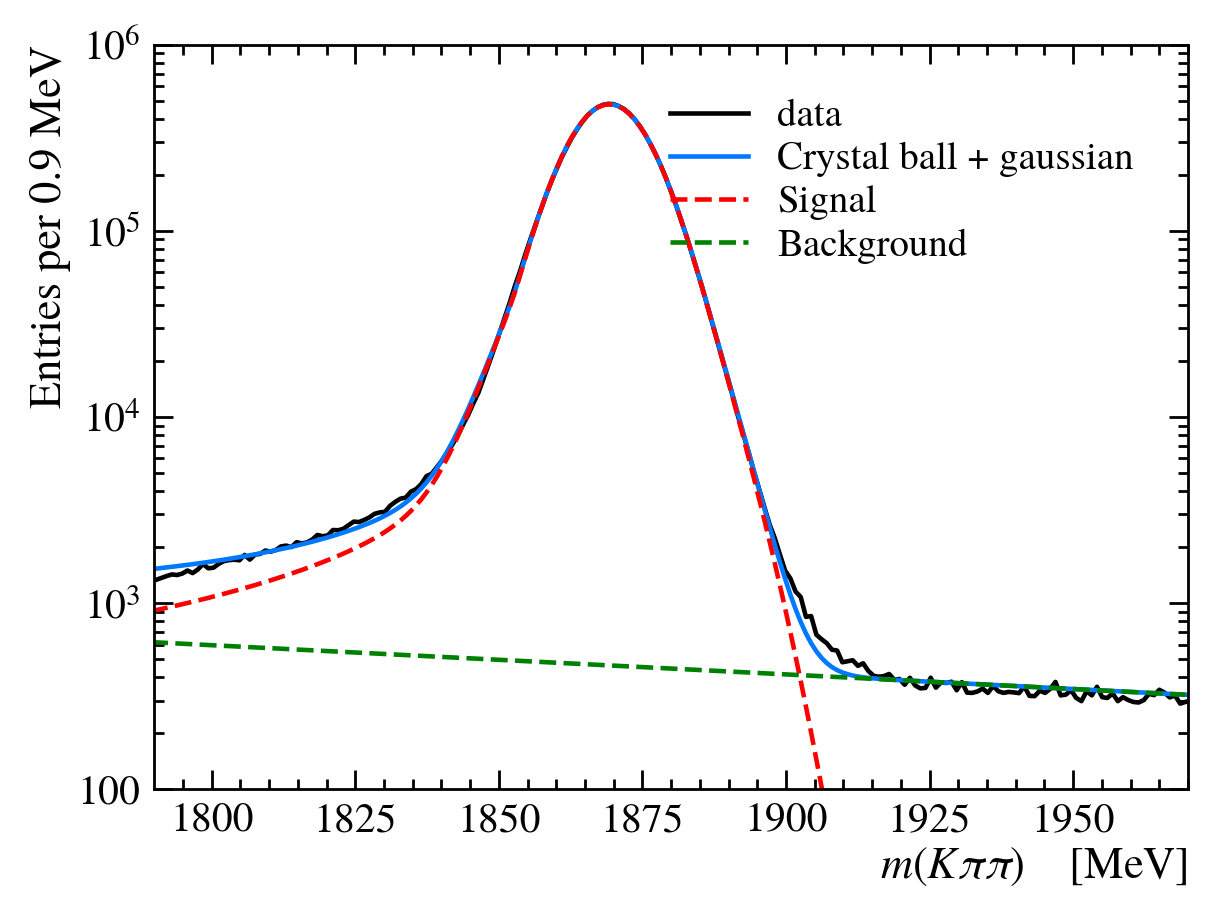

In [27]:
plt.plot(x, counts, color='black', label='data')
plt.plot(x,crys1(x), label='Crystal ball + gaussian')
plt.plot(x,crys1_signal(x), linestyle='--',color='red', label='Signal')
plt.plot(x, crys1_tail(x), linestyle='--',color='green', label='Background')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [28]:
crys2_mass = fl.Param(1870)('mass')
crys2_signal = (fl.Param.positive(600000)* fl.crystalball(fl.Param(0,10)(5), fl.Param(3)(1,30), crys2_mass, fl.Param.positive(5)('s1')) + 
            fl.Param.positive(600000)* fl.gaussian(crys2_mass, fl.Param.positive(6)('s2')) +
            fl.Param.positive(600000)* fl.gaussian(crys2_mass, fl.Param.positive(10)('s2')))
crys2_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1790)
crys2 = crys2_signal+crys2_tail

In [29]:
fit_crys2 = fl.fit(crys2 | fl.Cost.chi2(Dp_M, 200), numba=False, grad=False)
fit_crys2.minimizer

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 807.6                      │             Nfcn = 20058             │
│ EDM = 0.00015 (Goal: 0.0002)     │           time = 14.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  155.2e6  │   1.7e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │1.8692695e3│0.0000026e3│            │            │         │         │       │
│ 2 │ x2   │   5.978   │   0.014   │            │            │  1e-06  │         │       │
│ 3 │ x3   │   1.963   │   0.005   │            │            │    0    │   10    │       │
│ 4 │ x4   │ 1.000495  │ 0.000006  │            │            │    1    │   30    │       │
│ 5 │ x5   │  5.843e6  │  0.026e6  │            │            │  1e-06  │         │       │
│ 6 │ x6   │   7.920   │   0.016   │            │            │  1e-06  │         │       │
│ 7 │ x7   │  0.529e6  │  0.018e6  │            │            │  1e-06  │         │       │
│ 8 │ x8   │   13.29   │   0.09    │            │            │  1e-06  │         │       │
│ 9 │ x9   │  0.357e6  │  0.020e6  │            │            │  1e-06  │         │       │
│ 10│ x10  │    900    │    60     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │              x0              x1              x2              x3              x4              x5              x6              x7              x8              x9             x10 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │        2.89e+12      172.583110      -321.68511     -556.710924 -8.750137120888           0.6e9        21.81329         -0.33e9         321.413           2.3e9        7.4398e6 │
│  x1 │      172.583110         6.8e-06           -6e-6           -2e-6        0.665e-9        8.427033            0e-6       -1.776038            4e-6        2.944483        9.752e-3 │
│  x2 │      -321.68511           -6e-6        0.000187        0.033e-3       -2.330e-9      -228.31256        -0.03e-3        47.28588        -0.22e-3         7.63213        22.28e-3 │
│  x3 │     -556.710924           -2e-6        0.033e-3        2.57e-05       -2.953e-9      -98.738182        0.052e-3      -34.571493        0.150e-3       -9.112108      -28.349e-3 │
│  x4 │ -8.750137120888        0.665e-9       -2.330e-9       -2.953e-9        3.07e-11  6.073577008e-3       -2.130e-9   390.228740e-6       -5.327e-9  7.932506298e-3    25.659513e-6 │
│  x5 │           0.6e9        8.427033      -228.31256      -98.738182  6.073577008e-3        6.63e+08       -67.95249         -0.09e9         672.048              -0           1.1e3 │
│  x6 │        21.81329            0e-6        -0

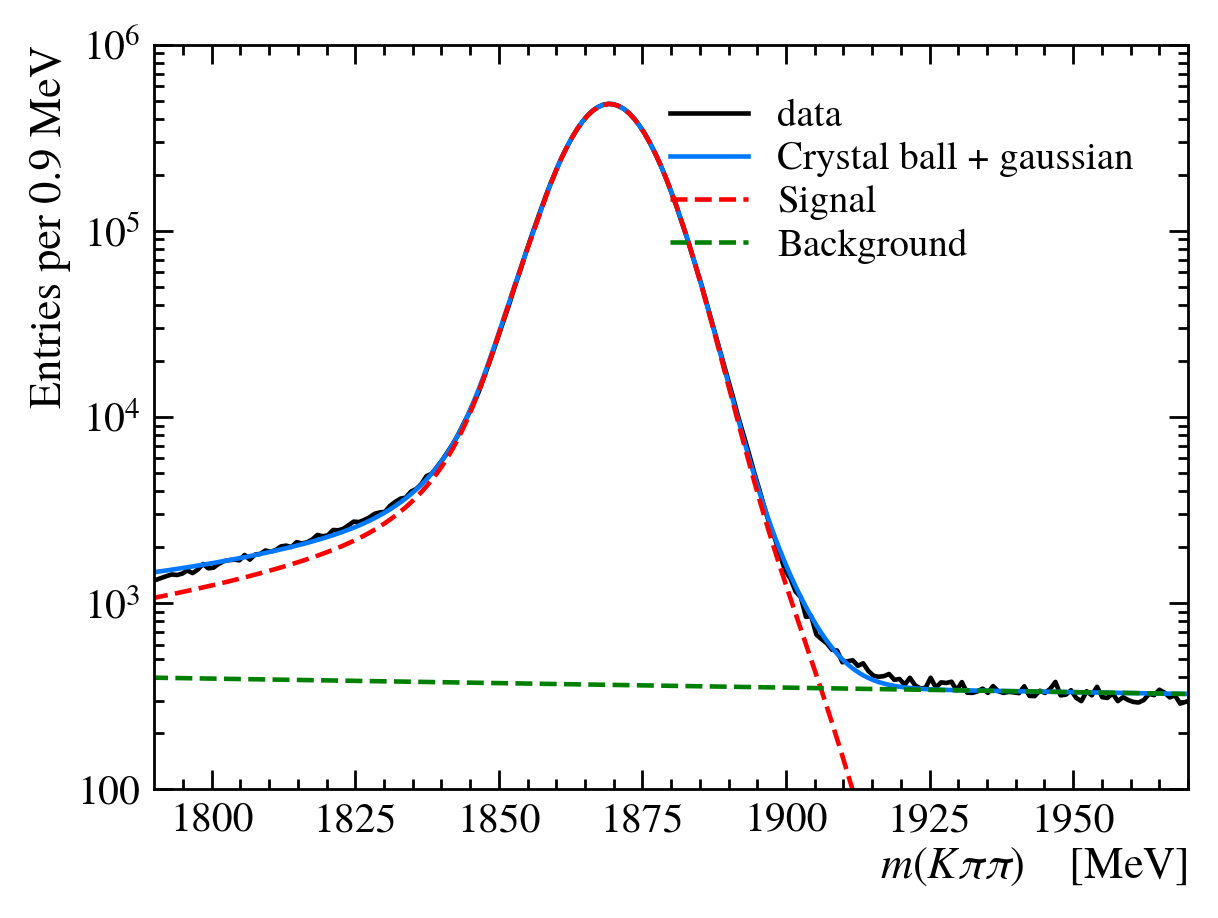

In [30]:
plt.plot(x, counts, color='black', label='data')
plt.plot(x,crys2(x), label='Crystal ball + gaussian')
plt.plot(x,crys2_signal(x), linestyle='--',color='red', label='Signal')
plt.plot(x, crys2_tail(x), linestyle='--',color='green', label='Background')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [33]:
fits = [fit_crys1, fit_crys2, fit_conv_kkp, fit_conv1, fit_conv2]
for fit in fits:
    print(f" & {len(fit.values)} & {fit.values['mass']:.3f} ± {fit.errors['mass']:.3f} &  & {fit.fval/(200 - len(fit.values)):.1f} \\\\")

 & 9 & 1869.230 ± 0.003 &  & 13.3 \\
 & 10 & 1869.269 ± 0.003 &  & 4.3 \\
 & 7 & 1869.294 ± 0.003 &  & 39.2 \\
 & 7 & 1869.394 ± 0.003 &  & 5.9 \\
 & 9 & 1869.394 ± 0.003 &  & 2.0 \\
